# CNN Architectures

This notebook implements different CNN architecutres. 
The Structure of CNN for the experiment: The CNN has four architecture: CNN 3x3 valid, CNN
5x5 valid, CNN 3X3 same and CNN 5x5 valid.

Data fed into CNNs is the image format generated from the original data. Data format 12*12 pixel image(array) with black pixels denoting ‘1s’ and white pixels denoting ‘0s’
present in the features.


In [1]:
# import libraries for data manipulation
import pandas as pd
import numpy as np
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split

# keras for model building
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras import backend as K

# for plotting the results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# define variables
wdth = 12
hight = 12
img_size = (wdth *hight)
epochs = 50

# our classes of the malware dataset
# 1 = malware
# 0 benign


Using TensorFlow backend.


In [2]:
# load the preprocessed numeric data - the form is the image 12X12
X = joblib.load(r"dataset\X_for_cnn" )
# load the labels corresponding to the image data
y = joblib.load(r"dataset\y" )
print(X.shape)
print(y.shape)

(11110, 12, 12, 1)
(11110,)


# CNN 3X3 filter - Valid

In [3]:
# CNN with 3X3 filter
model = Sequential()

# convolution layer wth 3X3 filter amd valid padding and Relu activation
model.add(Conv2D(img_size, (3, 3), input_shape= X.shape[1:]  ))
model.add(Activation('relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# adding drop out layer with 50% dropout
model.add(Dropout(0.5))

# Convert the feature map to the vector form 
model.add(Flatten())  
# fully connected dense layer
model.add(Dense(8))
# adding drop out layer with 50% dropout
model.add(Dropout(0.5))

# output layer with sigmoid function
model.add(Dense(1))
model.add(Activation('sigmoid'))

# compile the model with rmsprop optimizer and binary cross entrpy as loss function
# we also want accuracy to keep track of training
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print("Model Summary : ")
print(model.summary())

# Train model
history = model.fit(X, y, batch_size=32, epochs=epochs, validation_split=0.33 )

Model Summary : 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 10, 10, 144)       1440      
_________________________________________________________________
activation_1 (Activation)    (None, 10, 10, 144)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 144)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 144)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 28808     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0   

* Accuracy on test set: 93.45%


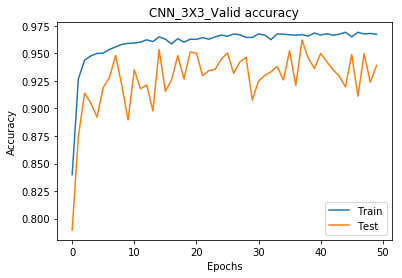

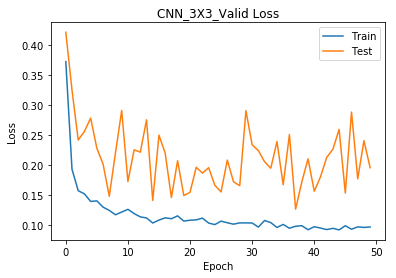

In [4]:
# Calcualte accuracy on test set
print('* Accuracy on test set: %0.2f%%' % (100 * np.mean( history.history['val_acc'][10:] ) ))

# Plot the ACCURACY of training and testing
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CNN_3X3_Valid accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot the LOSS of training and testing
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN_3X3_Valid Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
#save the model  and results for further analysis
joblib.dump(history.history['val_acc'], r"results\acc_cnn_3_valid")
joblib.dump(model, r"models\cnn_3_valid")


# CNN 5X5 - Valid

In [6]:
# CNN with 5X5 filter with valid convolution
model = Sequential()
model.add(Conv2D(img_size, (5, 5), input_shape= X.shape[1:]  ))
model.add(Activation('relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# dropout layer with 50% dropout rate
model.add(Dropout(0.5))


# Convert the feature map to the vector form 
model.add(Flatten())  
# fully connected dense layer
model.add(Dense(8))
# adding drop out layer with 50% dropout
model.add(Dropout(0.5))

# output layer with sigmoid function
model.add(Dense(1))
model.add(Activation('sigmoid'))

# compile the model with rmsprop optimizer and binary cross entrpy as loss function
# we also want accuracy to keep track of training
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print("Model Summary : ")
print(model.summary())

# start training
history = model.fit(X, y, batch_size=32, epochs=epochs, validation_split=0.33)

Model Summary : 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 8, 8, 144)         3744      
_________________________________________________________________
activation_3 (Activation)    (None, 8, 8, 144)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 144)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 144)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 18440     
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0   

* Accuracy on test set: 95.46%


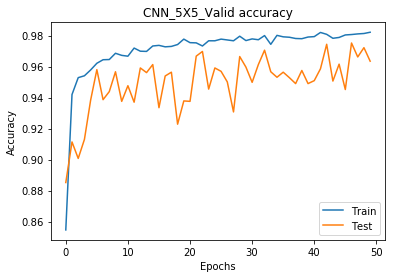

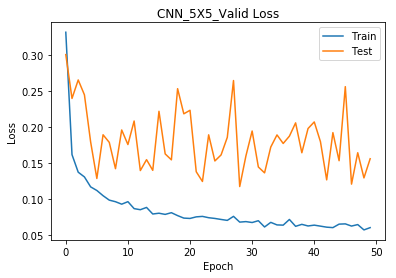

In [7]:
# Calcualte accuracy on test set
print('* Accuracy on test set: %0.2f%%' % (100 * np.mean( history.history['val_acc'][10:] ) ))

# Plot the ACCURACY of training and testing
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CNN_5X5_Valid accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot the LOSS of training and testing
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN_5X5_Valid Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
#save the model  and results for further analysis
joblib.dump(history.history['val_acc'], r"results\acc_cnn_5_valid")
joblib.dump(model, r"models\cnn_5_valid")


# CNN 3X3 - Same COnv

In [9]:
# CNN with 3X3 filter
model = Sequential()
# convolution layer with same padding
model.add(Conv2D(img_size, (3, 3), input_shape= X.shape[1:] , padding='same' ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Convert the feature map to the vector form 
model.add(Flatten())  
# fully connected dense layer
model.add(Dense(8))
# adding drop out layer with 50% dropout
model.add(Dropout(0.5))

# output layer with sigmoid function
model.add(Dense(1))
model.add(Activation('sigmoid'))

# compile the model with rmsprop optimizer and binary cross entrpy as loss function
# we also want accuracy to keep track of training
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print("Model Summary : ")
print(model.summary())

# start training
history = model.fit(X, y, batch_size=32, epochs=epochs, validation_split=0.33)

Model Summary : 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 12, 12, 144)       1440      
_________________________________________________________________
activation_5 (Activation)    (None, 12, 12, 144)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 144)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 144)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 41480     
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0   

* Accuracy on test set: 93.39%


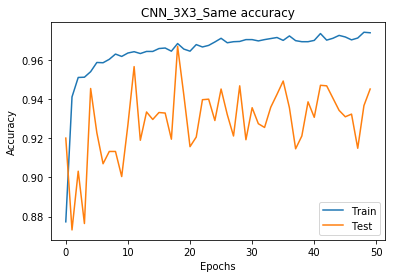

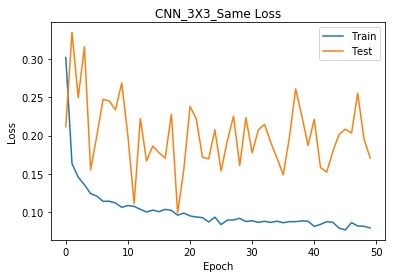

In [10]:
# Calcualte accuracy on test set
print('* Accuracy on test set: %0.2f%%' % (100 * np.mean( history.history['val_acc'][10:] ) ))

# Plot the ACCURACY of training and testing
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CNN_3X3_Same accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot the LOSS of training and testing
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN_3X3_Same Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
#save the model  and results for further analysis
joblib.dump(history.history['val_acc'], r"results\acc_cnn_3_same")
joblib.dump(model, r"models\cnn_3_same")


# CNN 5X5 - Same COnv

In [12]:
# CNN with 5X5 filter
model = Sequential()
# convolution layer with 5X5 filter and same padding
model.add(Conv2D(img_size, (5, 5), input_shape= X.shape[1:], padding = 'same'  ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Convert the feature map to the vector form 
model.add(Flatten())  
# fully connected dense layer
model.add(Dense(8))
# adding drop out layer with 50% dropout
model.add(Dropout(0.5))

# output layer with sigmoid function
model.add(Dense(1))
model.add(Activation('sigmoid'))

# compile the model with rmsprop optimizer and binary cross entrpy as loss function
# we also want accuracy to keep track of training
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print("Model Summary : ")
print(model.summary())

# start training
history = model.fit(X, y, batch_size=32, epochs=epochs, validation_split=0.33)

Model Summary : 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 12, 12, 144)       3744      
_________________________________________________________________
activation_7 (Activation)    (None, 12, 12, 144)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 144)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 6, 6, 144)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 41480     
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0   

* Accuracy on test set: 95.80%


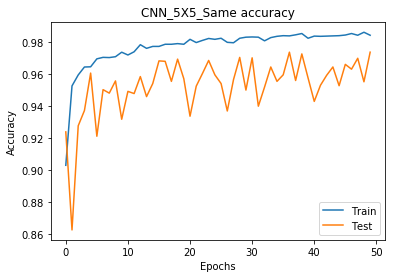

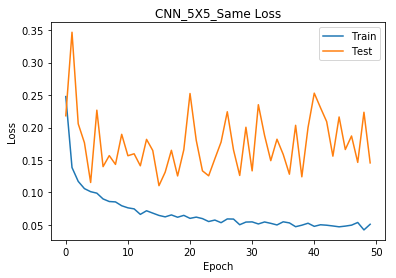

In [13]:
# Calcualte accuracy on test set
print('* Accuracy on test set: %0.2f%%' % (100 * np.mean( history.history['val_acc'][10:] ) ))

# Plot the ACCURACY of training and testing
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CNN_5X5_Same accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot the LOSS of training and testing
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN_5X5_Same Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
#save the model  and results for further analysis
joblib.dump(history.history['val_acc'], r"results\acc_cnn_5_same")
joblib.dump(model, r"models\cnn_5_same")
